In [1]:
!pip install sentence-transformers -q
!pip install gradio -q

In [2]:
import numpy as np
import pandas as pd
import torch
from sentence_transformers import SentenceTransformer, util
from sentence_transformers.util import cos_sim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Part 1: SBERT and Semantic Search

## Creating the dataset with 84 short stories about rabbits and Corgis!

In [3]:
stories = [
    "Three little rabbits danced in the meadow, their hearts brimming with joy as they basked in the warmth of the sun. They frolicked and played, their laughter echoing through the fields as they chased each other in gleeful abandon.",
    "The three little rabbits squealed with delight as they discovered a patch of wildflowers in full bloom. They nuzzled the fragrant petals, their eyes sparkling with happiness as they reveled in the beauty of nature.",
    "Three little rabbits snuggled together under a cozy blanket, their bellies full of their favorite treats. They sighed contentedly, their hearts warmed by the love and companionship they shared.",
    "The three little rabbits giggled with joy as they chased fireflies in the moonlit meadow. They leaped and bounded, their laughter filling the night air as they danced among the twinkling lights.",
    "Three little rabbits sat huddled together in their burrow, their ears drooping with sadness as they mourned the loss of their dear friend, a wise old owl. They shared fond memories of their feathered companion, their hearts heavy with grief.",
    "The three little rabbits watched with heavy hearts as the last rays of sunlight faded from the sky, signaling the end of another day. They sighed wistfully, feeling a pang of sadness at the thought of all the adventures they had yet to embark on.",
    "Three little rabbits sniffled back tears as they said goodbye to their favorite hiding spot beneath the old oak tree. They hugged the gnarled trunk one last time, their hearts heavy with sorrow as they bid farewell to their cherished sanctuary.",
    "The three little rabbits huddled together in the pouring rain, their fur soaked through and their spirits dampened by the dreary weather. They longed for the warmth and comfort of their burrow, their ears drooping with disappointment.",
    "Three little rabbits watched with envy as a family of deer pranced gracefully through the meadow, their elegant strides making them appear weightless. They sighed wistfully, wishing they too could move with such grace and beauty.",
    "The three little rabbits stared with envy at the colorful balloons floating high above the carnival, their hearts yearning to join in the festive celebration. They sighed wistfully, wishing they could experience the joy and excitement of the bustling fairground.",
    "Three little rabbits gazed with envy at the neighboring farm, where a family of pigs frolicked in the mud, their squeals of delight echoing across the fields. They sighed wistfully, wishing they too could experience the simple pleasures of farm life.",
    "The three little rabbits narrowed their eyes with jealousy as they watched a family of squirrels feasting on acorns in the shade of a towering oak tree. They sighed enviously, wishing they too could enjoy the tasty treats that the forest had to offer.",
    "Three little rabbits stamped their feet in anger as they discovered their favorite carrot patch had been plundered by a mischievous band of squirrels. They scolded and chased the intruders, their tails twitching with frustration as they defended their territory.",
    "The three little rabbits furrowed their brows in anger as they watched a group of playful fox cubs frolicking in the meadow. They grumbled to each other, their ears pinned back with irritation as they guarded their burrow against potential threats.",
    "Three little rabbits hopped around in a frenzy of rage as they discovered their freshly planted garden had been trampled by a careless herd of deer. They stomped their feet and chattered angrily, their noses twitching with irritation as they surveyed the damage.",
    "The three little rabbits scowled with fury as they watched a mischievous raccoon raiding their food stores. They bared their teeth and hissed, their tails bristling with anger as they chased the intruder away from their burrow.",
    "Three little rabbits bounced with excitement as they heard the distant rumble of the ice cream truck approaching the meadow. They hopped around in anticipation, their mouths watering at the thought of their favorite frozen treats.",
    "The three little rabbits squealed with excitement as they stumbled upon a hidden treasure chest buried beneath a pile of leaves. They pawed at the lid eagerly, their hearts racing with anticipation as they imagined the riches that lay within.",
    "Three little rabbits wriggled with excitement as they waited for their turn to ride the ferris wheel at the carnival. They bounced up and down, their ears twitching with anticipation as they watched the colorful cars ascending into the sky.",
    "The three little rabbits chattered with excitement as they watched the first snowflakes of winter begin to fall from the sky. They leaped and bounded through the meadow, their noses twitching with anticipation as they prepared for a day of snowy adventures.",
    "Three little rabbits watched with jealousy as a family of ducks splashed joyfully in the sparkling pond, their feathers glistening in the sunlight. They sighed enviously, wishing they too could experience the cool embrace of the water on a hot summer's day.",
    "The three little rabbits glared with jealousy as they watched a pair of chipmunks scampering playfully through the meadow, their tails held high with confidence. They sighed enviously, wishing they too could possess such boundless energy and enthusiasm.",
    "Three little rabbits felt a pang of jealousy as they watched a group of butterflies flitting gracefully through the air, their delicate wings shimmering in the sunlight. They sighed wistfully, wishing they too could experience the freedom of flight.",
    "Three little rabbits huddled together in their burrow, their hearts heavy with loneliness as they longed for the companionship of their absent siblings. They sighed wistfully, their ears drooping with sadness as they yearned for the warmth of their family's embrace.",
    "The three little rabbits sat on a hill overlooking the bustling meadow below, their ears drooping with loneliness as they watched the other animals playing together. They sighed softly, feeling a pang of sadness at the thought of being excluded from the fun and laughter.",
    "Three little rabbits wandered through the forest, their hearts heavy with loneliness as they searched for their missing friend, a playful squirrel named Nutmeg. They called out her name in vain, their voices echoing through the silent trees.",
    "The three little rabbits huddled together in the darkness of their burrow, their hearts heavy with loneliness as they listened to the sound of rain pattering against the roof. They longed for the comforting presence of their mother, whose soft voice used to soothe their fears.",
    "Three little rabbits hung their heads in disappointment as they discovered their favorite berry patch had been stripped bare by a hungry flock of birds. They sighed heavily, their noses twitching with frustration as they realized there would be no sweet treats for dessert tonight.",
    "The three little rabbits frowned with disappointment as they watched a group of rabbits from a neighboring meadow performing tricks at the circus. They sighed wistfully, wishing they too could showcase their talents and be admired by others.",
    "Three little rabbits shuffled their feet in disappointment as they arrived at the meadow to find that the annual flower festival had been canceled due to a sudden storm. They sighed heavily, their ears drooping with sadness as they turned back towards their burrow.",
    "The three little rabbits pouted with disappointment as they discovered that their homemade carrot cake had turned out flat and crumbly. They sighed in frustration, their ears drooping with sadness as they realized their culinary experiment had been a failure.",
    "Three little rabbits beamed with pride as they unveiled their freshly dug burrow to their friends, its tunnels intricate and its chambers cozy. They nudged each other affectionately, their chests puffed out with satisfaction as they showed off their new home.",
    "The three little rabbits preened with pride as they displayed their shiny new medals for winning the annual hopping contest. They hopped around in circles, their tails held high with satisfaction as they basked in the admiration of their fellow rabbits.",
    "Three little rabbits posed proudly for a portrait, their fur groomed to perfection and their ears perked up with confidence. They smiled for the camera, their eyes twinkling with pride as they immortalized their moment of glory.",
    "The three little rabbits stood tall with pride as they watched their vegetable garden flourish under their care, its rows of carrots and lettuce stretching as far as the eye could see. They nodded to each other in satisfaction, their hearts swelling with pride at their green thumbs.",
    "Three little rabbits giggled with mischief as they plotted to sneak into the farmer's garden under cover of darkness. They whispered and schemed, their ears twitching with excitement as they imagined the delicious vegetables they would pilfer.",
    "The three little rabbits grinned with mischief as they prepared to play a prank on their unsuspecting friend, a drowsy tortoise named Timothy. They crept up behind him, their tails wagging with excitement as they readied themselves for a day of mischief and mayhem.",
    "Three little rabbits snickered with mischief as they hid behind bushes, waiting to startle the passing humans with their sudden appearance. They giggled and whispered, their noses twitching with excitement as they planned their next mischievous escapade.",
    "The three little rabbits cackled with mischief as they filled the farmer's boots with water, their tails wagging with excitement as they anticipated his surprise. They darted away into the bushes, their laughter echoing through the meadow as they reveled in their prank.",
    "Three little corgis growled furiously as a pesky squirrel stole their prized chew toy. They lunged forward, teeth bared, determined to reclaim what was rightfully theirs.",
    "The three little corgis snarled with fury as they discovered their favorite hiding spot had been invaded by a mischievous raccoon. They barked ferociously, tails bristling with anger as they chased the intruder away.",
    "Three little corgis plotted revenge with murderous intent after a neighborhood cat dared to trespass on their territory. They exchanged sinister glances, tails twitching with anticipation of their nefarious plan.",
    "Three little corgis feigned innocence as they watched their owner clean up the mess they made in the living room. They exchanged knowing glances, tails wagging deceptively as they pretended to be oblivious to the chaos they caused.",
    "The three little corgis conspired together to pin the blame on the neighbor's dog after digging up the flower bed. They wagged their tails innocently, eyes shining with mischief as they awaited their owner's return.",
    "Three little corgis pretended to be fast asleep as their owner approached with a suspicious look on their face. They snored softly, tails wagging lazily, as they plotted their next prank.",
    "The three little corgis put on their best puppy eyes as they begged for treats after stealing a loaf of bread from the kitchen counter. They nudged each other playfully, tails wagging with excitement as they awaited their reward.",
    "Three little corgis showered their owner with slobbery kisses and tail wags after receiving a new toy. They bounded around the room, hearts filled with gratitude for the thoughtful gesture.",
    "The three little corgis snuggled close to their owner, their warm fur and gentle snores a testament to their deep affection. They licked their owner's hand, eyes filled with gratitude for the love and care they received.",
    "Three little corgis wagged their tails happily as they trotted alongside their owner on a sunny day. They glanced up at their owner with adoration, hearts brimming with gratitude for the companionship and adventure.",
    "The three little corgis basked in the warmth of the fireplace, their bellies full from a delicious meal. They curled up together, contented sighs escaping their lips as they drifted off to sleep, grateful for the comfort of their home.",
    "Three little corgis plotted revenge against the neighbor's cat after it stole their favorite bone. They licked their chops with anticipation, tails wagging with determination as they devised a plan to teach the feline thief a lesson.",
    "The three little corgis glared daggers at the mail carrier who dared to interrupt their nap with a loud knock on the door. They huddled together, tails bristling with anger, as they vowed to get back at the noisy intruder.",
    "Three little corgis growled menacingly at the vacuum cleaner that dared to invade their territory. They bared their teeth, tails held high with defiance, as they prepared to launch a counterattack against the noisy machine.",
    "The three little corgis eyed the squirrels in the backyard with a steely determination. They crouched low to the ground, tails twitching with anticipation, as they waited for the perfect moment to strike and reclaim their garden.",
    "Three little corgis yipped with excitement as they spotted their favorite toy at the pet store. They bounded down the aisle, tails wagging frantically, as they eagerly pounced on the colorful plush.",
    "The three little corgis raced around the backyard in a frenzy of excitement after hearing the sound of the treat bag. They leaped over obstacles, tongues lolling out, as they eagerly awaited their delicious reward.",
    "Three little corgis barked with joy as they chased after a butterfly fluttering in the garden. They bounded through the flowers, tails wagging with excitement, as they reveled in the thrill of the chase.",
    "The three little corgis danced in circles around their owner's feet, tails wagging with excitement, as they anticipated a walk in the park. They barked happily, noses twitching with excitement, as they waited for the adventure to begin.",
    "Three little corgis romped through the meadow, their laughter echoing through the air as they chased each other in playful abandon. They rolled in the grass, tails wagging with joy, as they reveled in the simple pleasure of being together.",
    "The three little corgis splashed in the pond, their barks of delight mingling with the sound of splashing water. They paddled around, tongues lolling out, as they enjoyed the cool embrace of the refreshing pool.",
    "Three little corgis bounded through the snow, their fluffy coats turning into little snowballs as they rolled around in the powder. They chased after snowflakes, tails wagging with joy, as they embraced the winter wonderland.",
    "The three little corgis snuggled together in their bed, their hearts full of contentment as they drifted off to sleep. They dreamed of chasing squirrels and playing fetch, tails twitching with happiness, as they rested in the warmth of their cozy den.",
    "Three little corgis sulked in the corner after being scolded for digging up the garden. They glared at their owner with resentment, ears pinned back, as they nursed their wounded pride.",
    "The three little corgis moped around the house after their favorite toy was taken away as punishment for chewing up the furniture. They sighed heavily, tails drooping with dejection, as they lamented the loss of their beloved plaything.",
    "Three little corgis huffed indignantly as they were forced to wear embarrassing costumes for a family photo. They glared at their owner with resentment, eyes narrowed in disapproval, as they plotted their revenge for the humiliation.",
    "The three little corgis grumbled under their breath as they were left behind during a family outing. They watched from the window with envy, tails swishing with resentment, as they longed to join in the fun.",
    "Three little corgis tumbled over each other in a comical heap as they raced to fetch a ball in the backyard. They rolled around in the grass, tongues lolling out, as they played a game of canine chaos.",
    "The three little corgis waddled around the house in oversized costumes, their floppy ears and wagging tails a hilarious sight to behold. They pranced and preened, striking poses for the camera, as they hammed it up for a family photo.",
    "Three little corgis barked with laughter as they watched their owner attempt to juggle treats in the air. They hopped around excitedly, tails wagging with amusement, as they cheered on the clumsy performance.",
    "The three little corgis howled with delight as they discovered a hidden stash of squeaky toys in the closet. They pounced on the plush playthings, tails wagging with excitement, as they reveled in the cacophony of squeaks and squawks.",
    "The three little corgis eyed the mail carrier with murderous thoughts after receiving an unwanted bath from the spray of the garden hose. They hatched a devious scheme to exact their revenge, tails wagging with anticipation of the chaos to come.",
    "The three little corgis glared daggers at the squirrels in the backyard with a steely determination. They crouched low to the ground, tails twitching with anticipation, as they waited for the perfect moment to strike and reclaim their garden."
]

## Creating the SBERT

In [4]:
#We then load the allenai-specter model with SentenceTransformers
model = SentenceTransformer('all-mpnet-base-v2') #Using SBERT - this model is a all-around model

#Compute embeddings for all papers
corpus_embeddings = model.encode(stories, convert_to_tensor=True, show_progress_bar=True)

def find_story(sentence,n):
  query_embedding = model.encode(sentence, convert_to_tensor=True)
  # We use cosine-similarity and torch.topk to find the highest 5 scores
  cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
  top_results = torch.topk(cos_scores, k=n)
  print("\n\n======================\n\n")
  print("Query:", sentence)
  print("\nTop 5 most similar sentences in corpus:")

  for score, idx in zip(top_results[0], top_results[1]):
      print(stories[idx], "(Score: {:.4f})".format(score))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
find_story("Bob was a happy",5)





Query: Bob was a happy

Top 5 most similar sentences in corpus:
Three little rabbits danced in the meadow, their hearts brimming with joy as they basked in the warmth of the sun. They frolicked and played, their laughter echoing through the fields as they chased each other in gleeful abandon. (Score: 0.3923)
Three little corgis showered their owner with slobbery kisses and tail wags after receiving a new toy. They bounded around the room, hearts filled with gratitude for the thoughtful gesture. (Score: 0.3697)
Three little rabbits snuggled together under a cozy blanket, their bellies full of their favorite treats. They sighed contentedly, their hearts warmed by the love and companionship they shared. (Score: 0.3690)
Three little corgis romped through the meadow, their laughter echoing through the air as they chased each other in playful abandon. They rolled in the grass, tails wagging with joy, as they reveled in the simple pleasure of being together. (Score: 0.3462)
Three little r

In [6]:
find_story("Three little rabbits sat huddled together in their burrow, their ears drooping with sadness as they mourned the loss of their dear friend, a wise old owl. They shared fond memories of their feathered companion, their hearts heavy with grief.",4)





Query: Three little rabbits sat huddled together in their burrow, their ears drooping with sadness as they mourned the loss of their dear friend, a wise old owl. They shared fond memories of their feathered companion, their hearts heavy with grief.

Top 5 most similar sentences in corpus:
Three little rabbits sat huddled together in their burrow, their ears drooping with sadness as they mourned the loss of their dear friend, a wise old owl. They shared fond memories of their feathered companion, their hearts heavy with grief. (Score: 1.0000)
Three little rabbits huddled together in their burrow, their hearts heavy with loneliness as they longed for the companionship of their absent siblings. They sighed wistfully, their ears drooping with sadness as they yearned for the warmth of their family's embrace. (Score: 0.8521)
Three little rabbits sniffled back tears as they said goodbye to their favorite hiding spot beneath the old oak tree. They hugged the gnarled trunk one last time, th

In [7]:
find_story("murderous",5)





Query: murderous

Top 5 most similar sentences in corpus:
Three little corgis plotted revenge with murderous intent after a neighborhood cat dared to trespass on their territory. They exchanged sinister glances, tails twitching with anticipation of their nefarious plan. (Score: 0.2883)
Three little rabbits hopped around in a frenzy of rage as they discovered their freshly planted garden had been trampled by a careless herd of deer. They stomped their feet and chattered angrily, their noses twitching with irritation as they surveyed the damage. (Score: 0.2513)
The three little corgis eyed the mail carrier with murderous thoughts after receiving an unwanted bath from the spray of the garden hose. They hatched a devious scheme to exact their revenge, tails wagging with anticipation of the chaos to come. (Score: 0.2461)
Three little corgis plotted revenge against the neighbor's cat after it stole their favorite bone. They licked their chops with anticipation, tails wagging with determi

### Gradio

In [8]:
def find_stories(story):
  results = []
  query_embedding = model.encode(story, convert_to_tensor=True)
  cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
  top_results = torch.topk(cos_scores, k=1)
  for score, idx in zip(top_results[0], top_results[1]):
    results.append((stories[idx], score))
    output = results[0][0]
    score = float(results[0][1].numpy())
  return output, score

In [9]:
import gradio as gr


gr.Interface(fn=find_stories, inputs=["text"], outputs=["text","label"]).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f47dcfd7f039df3e10.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Part 2: Gradient Descent and Attention Mechanism Exercises

## Gradient Descent Exercise

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/aaubs/ds-master/main/data/Swedish_Auto_Insurance_dataset.csv')
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_s = pd.DataFrame(data_scaled, columns=data.columns)

In [11]:
# Initializing Hyperparameters
epochs = 1
learning_rate = 2

# Initializing Parameters
w = 10

# 1. Creating a Neural Network
# 1.1 Structure (Architecture) of NN
def nn(x, w):
    """Output function y = x * w"""
    return x * w

# 1.2 Loss Function
def loss(y, t):
    """Calculate the Mean Squared Error"""
    return np.mean((t - y)**2)

# 1.3 Optmization Approach
def gradient(w, x, t):
    """Compute the gradient."""
    y = x * w
    return np.mean(2 * x * (y - t))

def delta_w(w_i, x, t, learning_rate):
    """Compute the weight update."""
    return learning_rate * gradient(w_i, x, t)

w_his = []
w_his.append(w)
# Loop over the number of epochs
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(data_s['X'])):
        x_i, t_i = data_s['X'][i], data_s['Y'][i]

        # 2. Forward Pass
        output = nn(x_i, w)

        # 3. FeedForward Evaluation
        loss_val = loss(output, t_i)

        # 4. Backward Pass / Gradient Calculation
        grad_value = gradient(w, x_i, t_i)  # Compute gradient
        dw = delta_w(w, x_i, t_i, learning_rate)

        # 5. Back Propagation / Update Weights
        w = w - dw

        w_his.append(w)

        # Accumulate loss
        total_loss += loss_val

        # Print gradient, dw, weight, and loss values in a single line
        print(f"Epoch {epoch+1}, Sample {i+1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

    # Print average loss for the epoch
    avg_loss = total_loss / len(data_s['X'])
    print(f"Epoch {epoch+1}: Average Loss = {avg_loss:.4f}\n")

Epoch 1, Sample 1: Gradient = 13.5523, Δw = 27.1046, w: -17.1046, loss: 60.5288
Epoch 1, Sample 2: Gradient = -0.8367, Δw = -1.6734, w: -15.4312, loss: 7.4545
Epoch 1, Sample 3: Gradient = -0.3470, Δw = -0.6940, w: -14.7372, loss: 2.7389
Epoch 1, Sample 4: Gradient = -31.4743, Δw = -62.9487, w: 48.2115, loss: 247.6586
Epoch 1, Sample 5: Gradient = 9.8512, Δw = 19.7023, w: 28.5092, loss: 233.1514
Epoch 1, Sample 6: Gradient = 11.6760, Δw = 23.3521, w: 5.1571, loss: 161.2963
Epoch 1, Sample 7: Gradient = 0.3049, Δw = 0.6097, w: 4.5474, loss: 0.6753
Epoch 1, Sample 8: Gradient = 0.0745, Δw = 0.1490, w: 4.3984, loss: 0.1088
Epoch 1, Sample 9: Gradient = 0.7906, Δw = 1.5813, w: 2.8171, loss: 1.1867
Epoch 1, Sample 10: Gradient = 0.0117, Δw = 0.0234, w: 2.7937, loss: 0.0053
Epoch 1, Sample 11: Gradient = 0.0051, Δw = 0.0102, w: 2.7836, loss: 0.0040
Epoch 1, Sample 12: Gradient = 0.3793, Δw = 0.7585, w: 2.0251, loss: 0.2400
Epoch 1, Sample 13: Gradient = 0.0220, Δw = 0.0440, w: 1.9811, loss: 

In [12]:
w= 10

x_i, t_i = data_s['X'][0], data_s['Y'][0]
output = x_i * w # Forward Pass
loss_val = np.mean((t_i - output)**2) #FeedForward Evaluation
grad_value = np.mean(2 * x_i * (output - t_i))  # Compute gradient
dw = learning_rate * grad_value # Backward Pass
w = w - dw # Back Propagation
print(f"Epoch {epoch+1}, Sample {1}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

Epoch 1, Sample 1: Gradient = 13.5523, Δw = 27.1046, w: -17.1046, loss: 60.5288


In [13]:
x_i, t_i = data_s['X'][1], data_s['Y'][2]
output = x_i * w # Forward Pass
loss_val = np.mean((t_i - output)**2) #FeedForward Evaluation
grad_value = np.mean(2 * x_i * (output - t_i))  # Compute gradient
dw = learning_rate * grad_value # Backward Pass
w = w - dw # Back Propagation
print(f"Epoch {epoch+1}, Sample {2}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

Epoch 1, Sample 2: Gradient = -0.8146, Δw = -1.6291, w: -15.4755, loss: 7.0652


In [14]:
x_i, t_i = data_s['X'][2], data_s['Y'][2]
output = x_i * w # Forward Pass
loss_val = np.mean((t_i - output)**2) #FeedForward Evaluation
grad_value = np.mean(2 * x_i * (output - t_i))  # Compute gradient
dw = learning_rate * grad_value # Backward Pass
w = w - dw # Back Propagation
print(f"Epoch {epoch+1}, Sample {3}: Gradient = {grad_value:.4f}, Δw = {dw:.4f}, w: {w:.4f}, loss: {loss_val:.4f}")

Epoch 1, Sample 3: Gradient = -0.3480, Δw = -0.6960, w: -14.7795, loss: 2.7543


## Attention Mechanism Exercise

In [15]:
Sentence1="The bat at the attic startled her"
Sentence2="He swung the bat at the baseball game"

In [16]:
# Define word embeddings
embeddings = {
    "the": np.array([0.1, 0.1]),
    "bat": np.array([0.3, 0.4]),
    "at": np.array([0.2, 0.1]),
    "attic": np.array([0.4, 0.6]),
    "startled": np.array([0.6, 0.7]),
    "her": np.array([0.1, 0.2]),
    "he": np.array([0.2, 0.2]),
    "swung": np.array([0.4, 0.3]),
    "baseball": np.array([0.6, 0.5]),
    "game": np.array([0.7, 0.6])
}

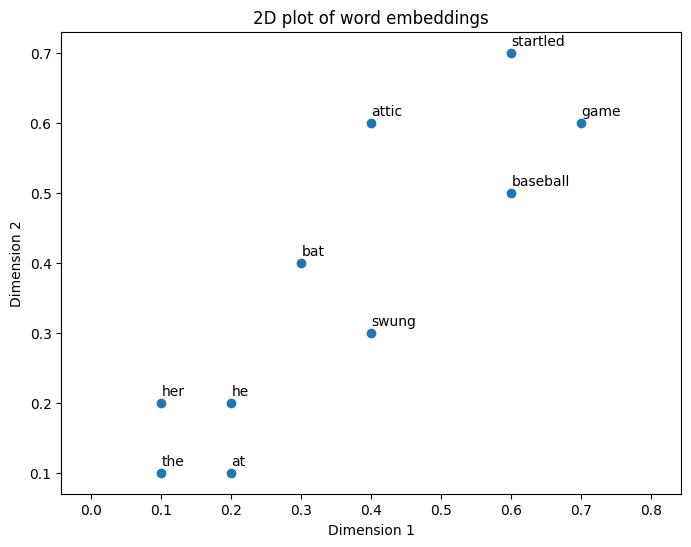

In [17]:
# Extract the coordinates for 2D plotting
x_2d_adj = [embeddings[word][0] for word in embeddings]
y_2d_adj = [embeddings[word][1] for word in embeddings]
words_2d_adj = list(embeddings.keys())

# Create a 2D plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter the points
ax.scatter(x_2d_adj, y_2d_adj)

# Annotate the points with words
for i, word in enumerate(words_2d_adj):
    ax.text(x_2d_adj[i], y_2d_adj[i] + 0.01, word)  # Adjust text position for clarity

# Set labels
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('2D plot of word embeddings')

# Set equal scaling
ax.axis('equal')

# Show the plot
plt.show()


### Sentence 1

In [18]:
# Sentence 1
sentence_1 = ["the", "bat", "at", "the", "attic", "startled", "her"]

# Initialize matrices for Q, K, V - calculate embeddings for these word by the embeddings he created earlier.
Q_1 = np.array([embeddings[word] for word in sentence_1])
K_1 = np.array([embeddings[word] for word in sentence_1])
V_1 = np.array([embeddings[word] for word in sentence_1])

# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_1 = Q_1.dot(K_1.T) #If he call dot product, he can calculate dot product between 2 vectors

# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_1 = np.apply_along_axis(softmax, 1, attention_scores_1)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_1 = attention_weights_1.dot(V_1)

In [19]:
attention_scores_1

array([[0.02, 0.07, 0.03, 0.02, 0.1 , 0.13, 0.03],
       [0.07, 0.25, 0.1 , 0.07, 0.36, 0.46, 0.11],
       [0.03, 0.1 , 0.05, 0.03, 0.14, 0.19, 0.04],
       [0.02, 0.07, 0.03, 0.02, 0.1 , 0.13, 0.03],
       [0.1 , 0.36, 0.14, 0.1 , 0.52, 0.66, 0.16],
       [0.13, 0.46, 0.19, 0.13, 0.66, 0.85, 0.2 ],
       [0.03, 0.11, 0.04, 0.03, 0.16, 0.2 , 0.05]])

In [20]:
attention_weights_1

array([[0.13753386, 0.14458538, 0.1389161 , 0.13753386, 0.14898866,
        0.15352604, 0.1389161 ],
       [0.12373342, 0.1481358 , 0.12750166, 0.12373342, 0.16536074,
        0.18275188, 0.12878308],
       [0.13527135, 0.14507962, 0.13800401, 0.13527135, 0.15100044,
        0.15874239, 0.13663085],
       [0.13753386, 0.14458538, 0.1389161 , 0.13753386, 0.14898866,
        0.15352604, 0.1389161 ],
       [0.11531084, 0.1495501 , 0.12001677, 0.11531084, 0.17549867,
        0.20187152, 0.12244127],
       [0.10777397, 0.14991016, 0.11443834, 0.10777397, 0.18310068,
        0.22141442, 0.11558846],
       [0.13445068, 0.14564868, 0.13580193, 0.13445068, 0.15311625,
        0.15936504, 0.13716676]])

In [21]:
attention_output_1

array([[0.2642683 , 0.32387717],
       [0.28336149, 0.34965055],
       [0.26748765, 0.32793263],
       [0.2642683 , 0.32387717],
       [0.29549706, 0.3659814 ],
       [0.30706328, 0.38093089],
       [0.26832732, 0.32958843]])

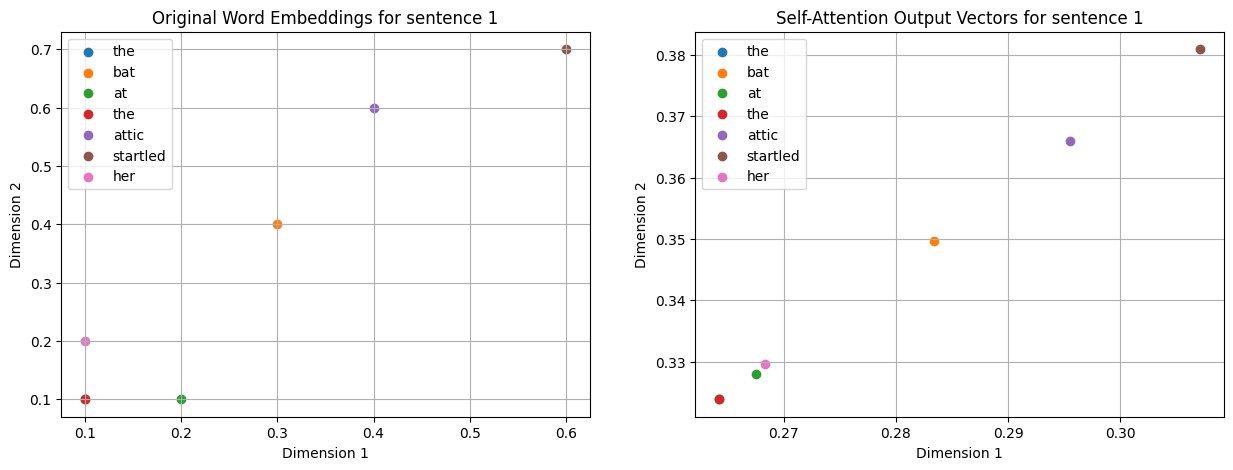

In [22]:
# Plotting the original embeddings and the attention output for sentence 1

# Extract the relevant embeddings for the first sentence
sentence_embeddings_1 = np.array([embeddings[word] for word in sentence_1])

# Convert the attention output for the first sentence to a numpy array for ease of use
attention_output_array_1 = np.array(attention_output_1)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_1):
    axes[0].scatter(sentence_embeddings_1[i, 0], sentence_embeddings_1[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for sentence 1')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot output vectors
for i, word in enumerate(sentence_1):
    axes[1].scatter(attention_output_array_1[i, 0], attention_output_array_1[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for sentence 1')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()

In [23]:
# Calculate the Euclidean distance between "bat" and "attic" in the original embeddings for the second sentence
original_bat = embeddings["bat"]
original_attic = embeddings["attic"]
distance_original = np.linalg.norm(original_bat - original_attic)

# Find the positions of "bat" and "attic" in the second sentence
bat_position = sentence_1.index("bat")
attic_position = sentence_1.index("attic")

# Calculate the Euclidean distance between "bat" and "attic" in the output vectors for the second sentence
output_bat = attention_output_1[bat_position]
output_attic = attention_output_1[attic_position]
distance_output = np.linalg.norm(output_bat - output_attic)

distance_original, distance_output

(0.22360679774997894, 0.02034622148057357)

###Sentence 2

In [24]:
# Sentence 2
sentence_2 = ["he", "swung", "the", "bat", "at", "the", "baseball", "game"]

# Initialize matrices for Q, K, V - calculate embeddings for these word by the embeddings he created earlier.
Q_2 = np.array([embeddings[word] for word in sentence_2])
K_2 = np.array([embeddings[word] for word in sentence_2])
V_2 = np.array([embeddings[word] for word in sentence_2])

# Step 1: Similarity - Calculate dot products for Q and K (attention scores)
attention_scores_2 = Q_2.dot(K_2.T) #If he call dot product, he can calculate dot product between 2 vectors

# Step 2: Weights - Apply softmax to attention scores
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

attention_weights_2 = np.apply_along_axis(softmax, 1, attention_scores_2)

# Step 3: Contextualized vector - Multiply attention weights by V and sum to get output vectors
attention_output_2 = attention_weights_2.dot(V_2)

In [25]:
attention_scores_2

array([[0.08, 0.14, 0.04, 0.14, 0.06, 0.04, 0.22, 0.26],
       [0.14, 0.25, 0.07, 0.24, 0.11, 0.07, 0.39, 0.46],
       [0.04, 0.07, 0.02, 0.07, 0.03, 0.02, 0.11, 0.13],
       [0.14, 0.24, 0.07, 0.25, 0.1 , 0.07, 0.38, 0.45],
       [0.06, 0.11, 0.03, 0.1 , 0.05, 0.03, 0.17, 0.2 ],
       [0.04, 0.07, 0.02, 0.07, 0.03, 0.02, 0.11, 0.13],
       [0.22, 0.39, 0.11, 0.38, 0.17, 0.11, 0.61, 0.72],
       [0.26, 0.46, 0.13, 0.45, 0.2 , 0.13, 0.72, 0.85]])

In [26]:
attention_weights_2

array([[0.11943234, 0.12681762, 0.11474933, 0.12681762, 0.11706742,
        0.11474933, 0.13737989, 0.14298647],
       [0.11470737, 0.12804533, 0.10695245, 0.12677125, 0.11131726,
        0.10695245, 0.14728718, 0.15796671],
       [0.12227871, 0.12600265, 0.11985743, 0.12600265, 0.12106201,
        0.11985743, 0.13114491, 0.13379422],
       [0.11518481, 0.1272989 , 0.1073976 , 0.12857828, 0.11066835,
        0.1073976 , 0.14642859, 0.15704586],
       [0.12063345, 0.12681846, 0.11706819, 0.1255566 , 0.11943313,
        0.11706819, 0.13466048, 0.1387615 ],
       [0.12227871, 0.12600265, 0.11985743, 0.12600265, 0.12106201,
        0.11985743, 0.13114491, 0.13379422],
       [0.10837271, 0.1284547 , 0.09708397, 0.12717655, 0.10308731,
        0.09708397, 0.16006441, 0.17867639],
       [0.10507877, 0.1283435 , 0.09226919, 0.12706646, 0.09895946,
        0.09226919, 0.16645255, 0.18956088]])

In [27]:
attention_output_2

array([[0.34154061, 0.30179723],
       [0.35479393, 0.31300941],
       [0.33318438, 0.29458427],
       [0.35393245, 0.31264611],
       [0.33775065, 0.29833896],
       [0.33318438, 0.29458427],
       [0.37235576, 0.32804513],
       [0.38128297, 0.33565798]])

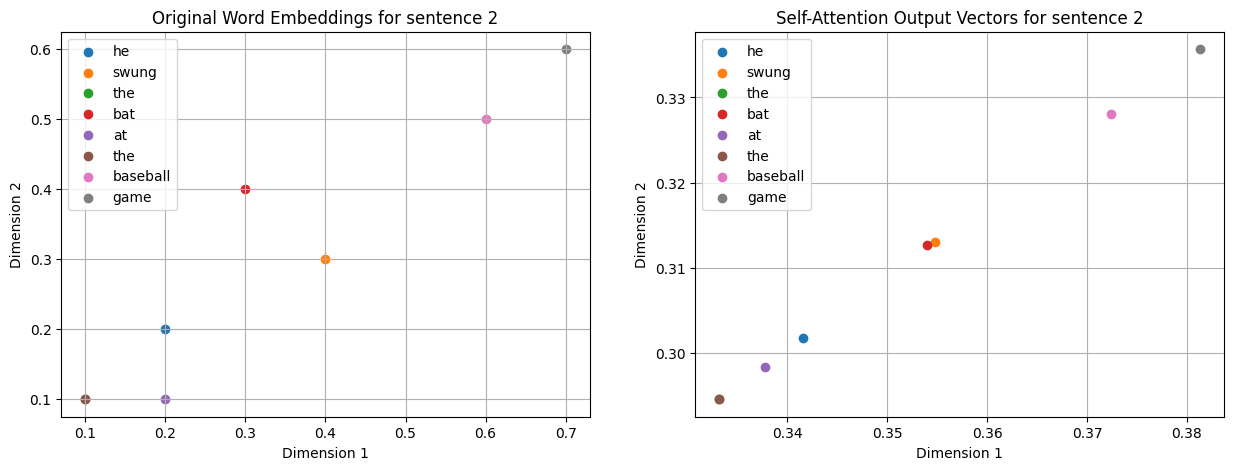

In [28]:
# Plotting the original embeddings and the attention output for sentence 2

# Extract the relevant embeddings for the first sentence
sentence_embeddings_2 = np.array([embeddings[word] for word in sentence_2])

# Convert the attention output for the first sentence to a numpy array for ease of use
attention_output_array_2 = np.array(attention_output_2)

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot original embeddings
for i, word in enumerate(sentence_2):
    axes[0].scatter(sentence_embeddings_2[i, 0], sentence_embeddings_2[i, 1], label=f"{word}")

axes[0].set_title('Original Word Embeddings for sentence 2')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True)
axes[0].legend()

# Plot output vectors
for i, word in enumerate(sentence_2):
    axes[1].scatter(attention_output_array_2[i, 0], attention_output_array_2[i, 1], label=f"{word}")

axes[1].set_title('Self-Attention Output Vectors for sentence 2')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].grid(True)
axes[1].legend()

plt.show()

In [29]:
# Calculate the Euclidean distance between "bat" and "swung" in the original embeddings for the second sentence
original_bat = embeddings["bat"]
original_swung = embeddings["swung"]
distance_original = np.linalg.norm(original_bat - original_swung)

# Find the positions of "bat" and "swung" in the second sentence
bat_position = sentence_2.index("bat")
swung_position = sentence_2.index("swung")

# Calculate the Euclidean distance between "bat" and "swung" in the output vectors for the second sentence
output_bat = attention_output_2[bat_position]
output_swung = attention_output_2[swung_position]
distance_output = np.linalg.norm(output_bat - output_swung)

distance_original, distance_output

(0.14142135623730956, 0.0009349450535026843)

### Attention weights

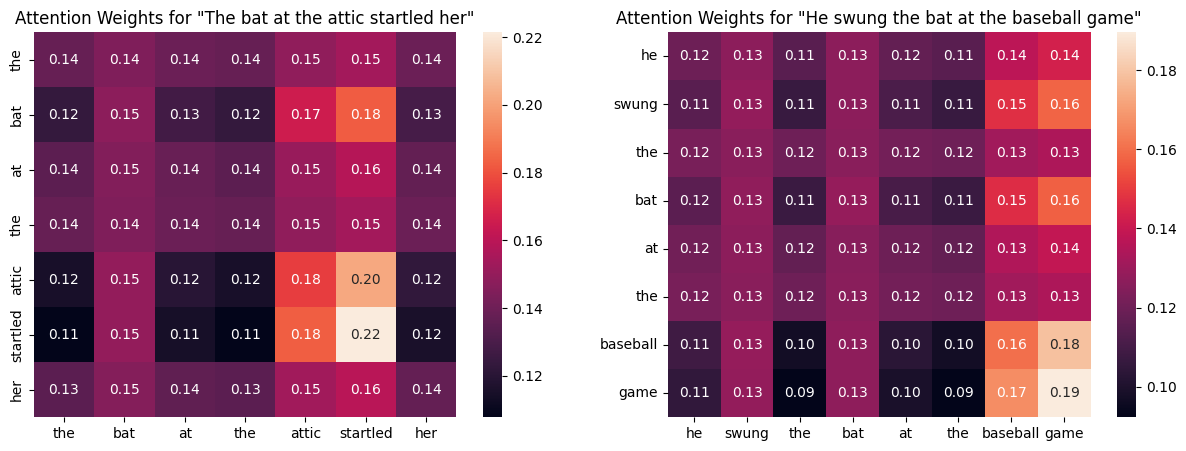

In [30]:
# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Sentence 1: "the bank of the river"
# Create a heatmap for the attention weights of the first sentence
sns.heatmap(attention_weights_1, annot=True, fmt=".2f", xticklabels=sentence_1, yticklabels=sentence_1, ax=axes[0])
axes[0].set_title('Attention Weights for "The bat at the attic startled her"')

# Sentence 2: "Money in the bank"
# Create a heatmap for the attention weights of the second sentence
sns.heatmap(attention_weights_2, annot=True, fmt=".2f", xticklabels=sentence_2, yticklabels=sentence_2, ax=axes[1])
axes[1].set_title('Attention Weights for "He swung the bat at the baseball game"')

plt.show()